# Ejercicio 5 - guía 9

Generar datos sintéticos de una regresión lineal simple con ruido gaussiano, como los que
generábamos cuando veíamos regresión lineal frecuentista. Por ejemplo, considerar la función
𝑓 : R → R dada por 𝑓 (𝑥) = 2𝑥 − 1, 𝑋 ∼ U (0, 1), 𝑌 := 𝑓 (𝑋) y 𝑛 = 100; tomar muestras 𝑥1, . . . , 𝑥𝑛
de 𝑋 y aplicar la función 𝑓 a cada muestra para calcular 𝑦𝑖 = 𝑓 (𝑥𝑖), con 1 ≤ 𝑖 ≤ 𝑛.

## a)
Ajustar un modelo lineal de la forma 𝑦 ∼ N (𝛽0 + 𝛽1𝑥, 𝜖) usando PyMC. Graficar y describir
las posterior de los parámetros de la regresión

### Desarrollo

Primero antes de ajustar el modelo genero las muestras que me pide el enunciado:

In [15]:
from scipy.stats import uniform
from scipy.stats import norm

def f(x):
    return 2*x -1

n_muestras = 100
X = uniform.rvs(size=100)
Y = f(X) + norm.rvs(loc= 0, scale = 0.2,size=100)

Armo un gráfico para ver la relación de las variables:

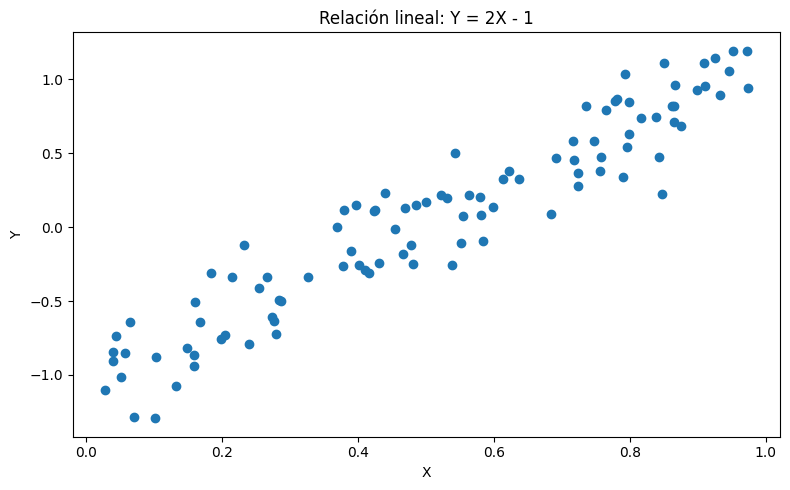

In [16]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8, 5))    
plt.scatter(X,Y)
plt.title('Relación lineal: Y = 2X - 1')
plt.xlabel('X')
plt.ylabel('Y')
plt.tight_layout()
plt.show()

Ahora ajusto el modelo usando PyMC:

In [17]:
import pymc as pm
import arviz as az

with pm.Model() as model:

    # Defino los priors
    B0 = pm.Normal('B0', mu=0, sigma=10)
    B1 = pm.Normal('B1', mu=0, sigma=10)
    mu = B0 + B1*X
    sigma = pm.HalfNormal('sigma', sigma=1)
    
    # Defino la likelihood
    Y_obs = pm.Normal('Y_obs', mu=mu, sigma=sigma, observed=Y)
    
    # Obtengo las muestras de la posterior
    idata = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [B0, B1, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 106 seconds.


Analizo los resultados:

In [18]:
pm.summary(idata)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
B0,-1.065,0.043,-1.144,-0.983,0.001,0.001,1870.0,1971.0,1.0
B1,2.189,0.073,2.052,2.323,0.002,0.001,1815.0,1735.0,1.0
sigma,0.207,0.016,0.177,0.235,0.000,0.000,2373.0,1664.0,1.0


Y ahora armo gráficos de la posterior de los parámetros de la regresión:

<Figure size 800x500 with 0 Axes>

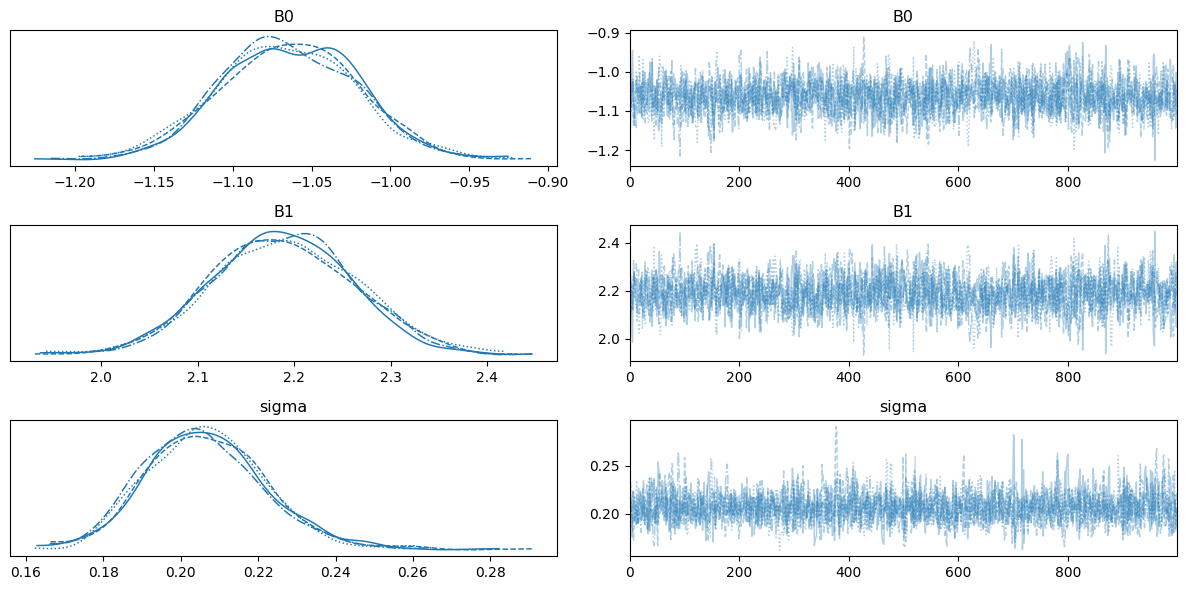

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
az.plot_trace(idata)
plt.tight_layout()
plt.show()

## b)
¿Cuál es el valor que estimamos que tenga 𝑓 (1/2)? ¿Con qué error?

### Desarrollo

Para responder este inciso, usaré las distribuciones estimadas para cada parámetro de la regresión:

In [25]:
X_a_predecir = 1/2

X_pred = idata.posterior['B0'].values.flatten() + idata.posterior['B1'].values.flatten()*X_a_predecir

print(f'El valor espera de Y para X = 1/2 es {X_pred.mean()}')
print(f'La desviación estándar de Y para X = 1/2 es {X_pred.std()}')

El valor espera de Y para X = 1/2 es 0.02967913399069588
La desviación estándar de Y para X = 1/2 es 0.02067119970479247


## c)
Graficar y dar percentiles de la distribución de 𝛽0 + (1/2)𝛽1.

### Desarrollo

Primero armo un histograma de la distribución predicha:

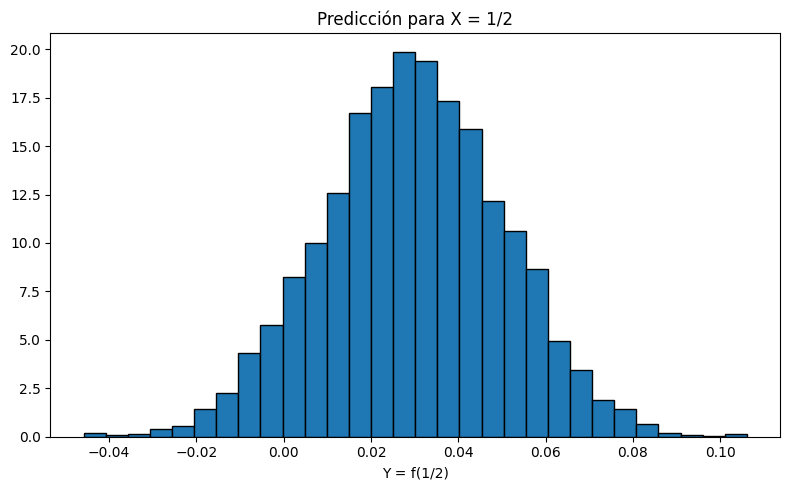

In [26]:
plt.figure(figsize=(8, 5))
plt.hist(X_pred, bins=30, density=True, edgecolor='black')
plt.title('Predicción para X = 1/2')
plt.xlabel('Y = f(1/2)')
plt.tight_layout()
plt.show()

Y finalmente muestro algunos percentiles:

In [29]:
import numpy as np

print('Percentiles para la distribución de Y = f(1/2) predicha:')
print(f'Percentil 2.5: {np.percentile(X_pred, 2.5)}')
print(f'Percentil 50: {np.percentile(X_pred, 50)}')
print(f'Percentil 97.5: {np.percentile(X_pred, 97.5)}')

Percentiles para la distribución de Y = f(1/2) predicha:
Percentil 2.5: -0.01075158540103439
Percentil 50: 0.029817626504248462
Percentil 97.5: 0.06976611805590358
